In [1]:
from create_data import DumbCirc as dc
from labelsq import LabeledSUQ as lsq
import matplotlib
import matplotlib.pyplot as plt

In [2]:
data_instance = dc(0.5, 0.5, 0.25, 22)
fc, nc, pc, l, tc, lt = data_instance.create_dataset(50, 2, [50], [0.2], True)

In [3]:
import torch
torch.manual_seed(22)
fc, pc, l, tc, lt = torch.tensor(fc), torch.tensor(pc), torch.tensor(l), torch.tensor(tc), torch.tensor(lt)

In [4]:
model = lsq(point_cloud=fc, partial_cloud=pc, test_partial=tc, train_labels=l, mapping_dim=6, count_labels=2)

In [5]:
use_cuda = torch.cuda.is_available()
#device = torch.device("cuda" if use_cuda else "cpu")
device = "cpu"
model.set_device(device)

In [6]:
model.set_test_data(tc, lt)

In [7]:
model.train(num_epochs=10, batch_size=20, learning_rate=0.001)

C:\Users\Acer\Documents\All_of_RWTH\ThesisTarget\1MYWORK\thesis_notebooks\labelsq.py:157: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3679.)
  + posterior_mean.T @ torch.linalg.inv(posterior_var) @ posterior_mean)


Epoch:0, Loss: 0.13011812567710876
Epoch:1, Loss: 0.14343967765569687
Epoch:2, Loss: 0.14173116332292557
Epoch:3, Loss: 0.13775468279123307
Epoch:4, Loss: 0.13540216616630554
Epoch:5, Loss: 0.14131856427955627
Epoch:6, Loss: 0.1490868741599083
Epoch:7, Loss: 0.14521573115045547
Epoch:8, Loss: 0.15165555552374269
Epoch:9, Loss: 0.155587664397023


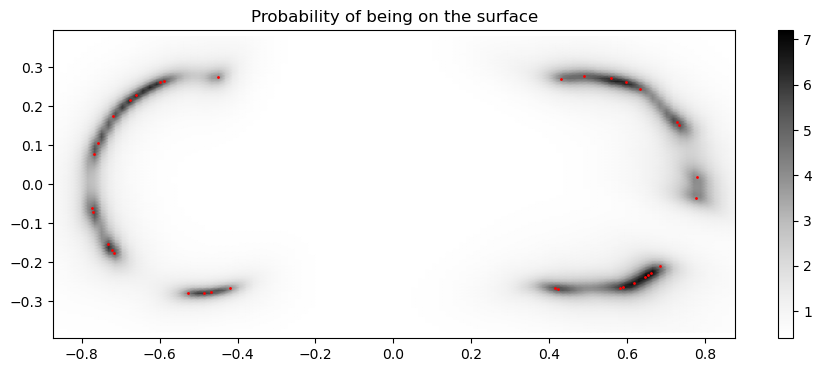

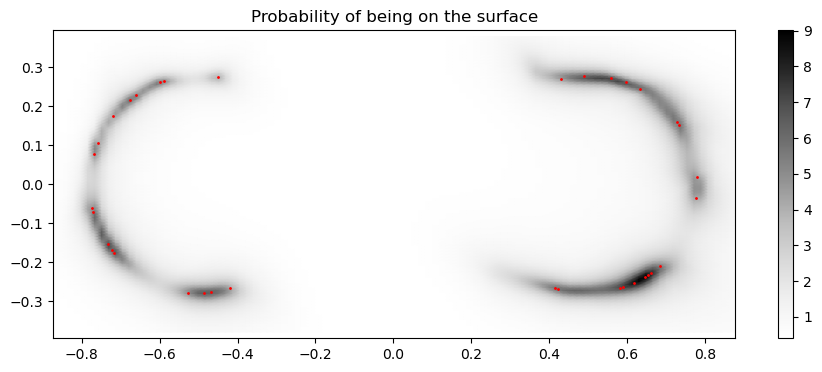

In [8]:
model.predict()

In [9]:
model.set_test_data(pc[2:4, :], l[2:4, :])

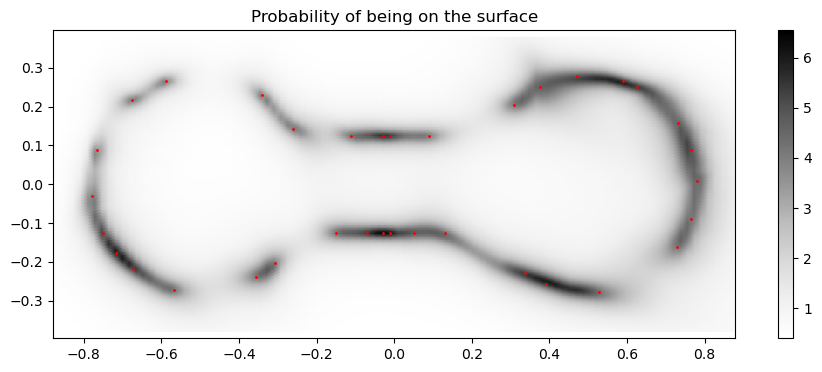

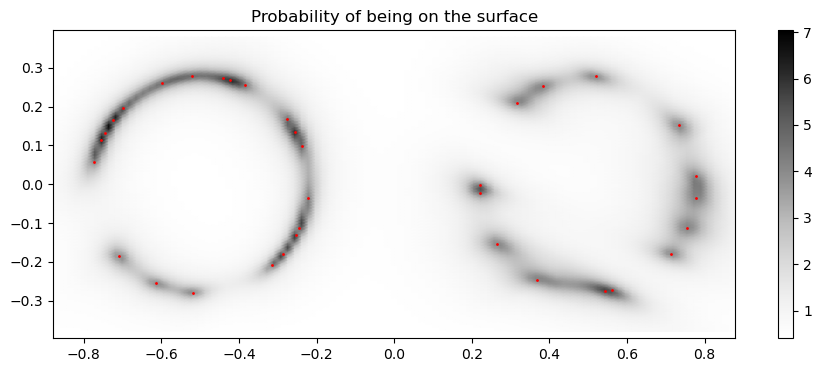

In [10]:
model.predict()